<a href="https://colab.research.google.com/github/jhonatanlang/DSP2/blob/master/Activity_10/10_filtros_Imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 10: Filtros em Imagens

###Alunos: Hazael dos Santos Batista; Jhonatan de Freitas Lang

## Filtros passa-baixas

**1. Vimos que para filtrar uma imagem, é necessário definir um _kernel_, que nada mais é que a resposta ao impulso do filtro. Considere a imagem [1]. Defina filtros passa-baixas (a) 3x3 e (b) 9x9. Você pode gerar manualmente a matriz (como no exemplo _Blur_ de [2]) ou usar um dos elementos estruturantes (_square_, _disk_, etc.) do módulo _morphology_ do Skimage [3]. Filtre a imagem. A imagem é melhorada com esses filtros?**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as scisig

import skimage.io as skio
from skimage import img_as_float
from skimage import exposure
from skimage import morphology as morph

image = skio.imread('hw3_train.jpg')

# Low-pass 3x3 kernel
kernel_a = np.divide(morph.square(3), 3**2)

# Low-pass 9x9 kernel
kernel_b = np.divide(morph.square(9), 9**2)

# Muito lento, usar convolve2d
#def apply_kernel(image, kernel):
#    offset = len(kernel) // 2
#    new_image = morph.rectangle(image.shape[0], image.shape[1])
#    
#    for x in range(offset, image.shape[1] - offset):
#        for y in range(offset, image.shape[0] - offset):
#            acc = 0
#            for a in range(len(kernel)):
#                for b in range(len(kernel)):
#                    xn = x + a - offset
#                    yn = y + b - offset
#                    acc += kernel[a][b] * image[yn][xn]
#            
#            new_image[y][x] = acc
#    
#    return new_image

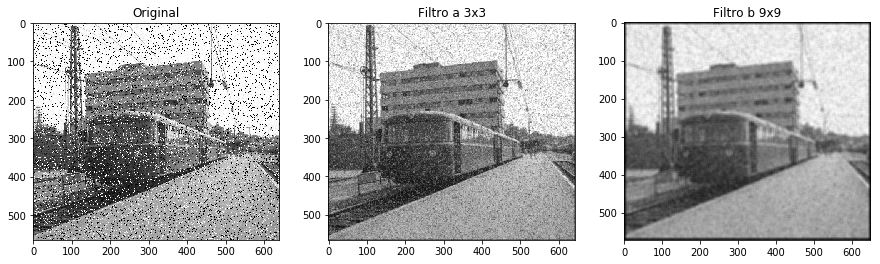

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes = axes.ravel()

axes[0].imshow(image, 'gray')
axes[0].set_title("Original")

image_a = scisig.convolve2d(image, kernel_a)
axes[1].imshow(image_a, 'gray')
axes[1].set_title("Filtro a 3x3")

image_b = scisig.convolve2d(image, kernel_b)
axes[2].imshow(image_b, 'gray')
axes[2].set_title("Filtro b 9x9")

plt.show()

Sim, o filtro passa baixas retira o ruído de alta frequência da imagem tornando mais fácil de reconhecer os objetos nela. Porém quanto maior o kernel mais se perde em detalhes.

**2. Filtre novamente a mesma imagem [1], mas usando um filtro de média bilateral [4]. Explique suas vantagens.**

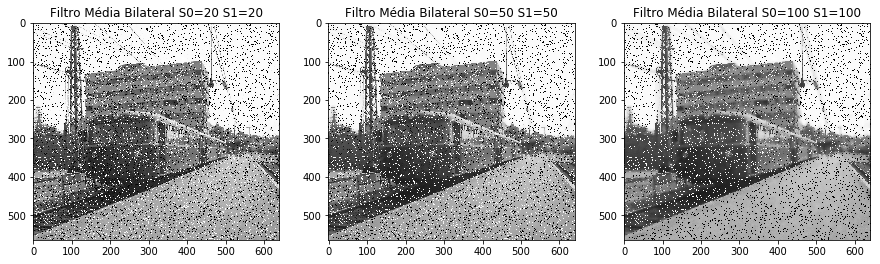

In [11]:
from skimage.filters.rank import mean_bilateral

fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes = axes.ravel()

image_bilat = mean_bilateral(image.astype(np.uint16), morph.disk(5), s0=20, s1=20)
axes[0].imshow(image_bilat, 'gray')
axes[0].set_title("Filtro Média Bilateral S0=20 S1=20")

image_bilat = mean_bilateral(image.astype(np.uint16), morph.disk(5), s0=50, s1=50)
axes[1].imshow(image_bilat, 'gray')
axes[1].set_title("Filtro Média Bilateral S0=50 S1=50")

image_bilat = mean_bilateral(image.astype(np.uint16), morph.disk(5), s0=100, s1=100)
axes[2].imshow(image_bilat, 'gray')
axes[2].set_title("Filtro Média Bilateral S0=100 S1=100")

plt.show()

Não houve vantagem em usar a média bilateral.

**3. Filtre a mesma imagem [1] com filtro de mediana [5]. A imagem é melhorada? Qual a influência do tamanho do filtro e do formato do elemento estruturante? O filtro de mediana é linear?**

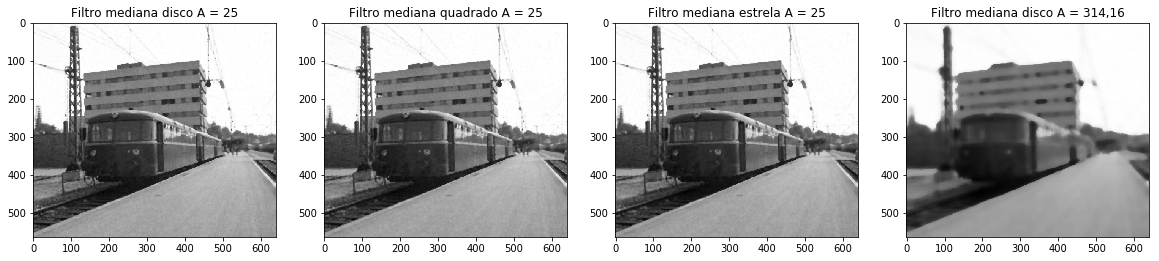

In [18]:
from skimage.filters.rank import median

fig, axes = plt.subplots(1, 4, figsize=(20, 15))
axes = axes.ravel()

# Disco com área 25
image_median = median(image.astype(np.uint16), morph.disk(2.82))
axes[0].imshow(image_median, 'gray')
axes[0].set_title("Filtro mediana disco A = 25")

# Quadrado com área 25
image_median = median(image.astype(np.uint16), morph.square(5))
axes[1].imshow(image_median, 'gray')
axes[1].set_title("Filtro mediana quadrado A = 25")


# Estrela com área 29.29
# morph.star não aceita argumentos de ponto flutuante, portanto foi
# utilizado argumento 2 para obter a área mais próxima possível
image_median = median(image.astype(np.uint16), morph.star(2))
axes[2].imshow(image_median, 'gray')
axes[2].set_title("Filtro mediana estrela A = 25")


# Disco com área 314.16
image_median = median(image.astype(np.uint16), morph.disk(10))
axes[3].imshow(image_median, 'gray')
axes[3].set_title("Filtro mediana disco A = 314,16")


plt.show()

Modificar o formato do elemento estruturante, mantendo áreas parecidas, não pareceu modificar o resultado de forma significativa.

Aumentar a área do elemento estruturante suaviza (gera blur) a imagem.

O filtro de mediana não é linear, já que é um filtro que seleciona uma intensidade de pixel dentre as entradas fornecidas, e não um filtro que faz uma operação linear com as entradas fornecidas.

## Filtros passa-altas

**4. Considere a imagem [6]. Procure melhorá-la (aguçar os contornos) usando um filtro linear. Você pode usar um filtro passa-altas (como no exemplo _Sharpening_ de [2]) ou a máscara *unsharp_mask* de `skimage.filters` [7].**

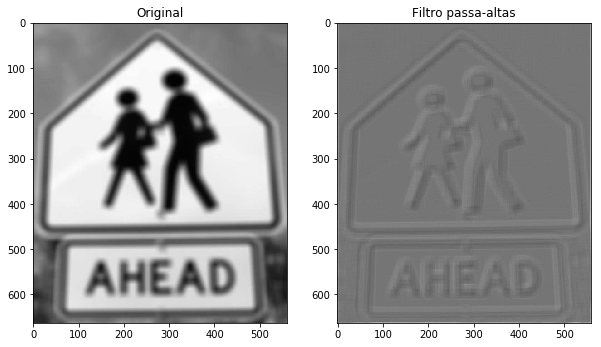

In [19]:
from skimage.filters import unsharp_mask

image2 = skio.imread('hw3_road_sign_school_blurry.jpg')

kernel_hp = np.multiply(morph.square(8), -1)
offset = kernel_hp.shape[0] // 2
kernel_hp[offset][offset] += kernel_hp.size

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes = axes.ravel()

image_hp = scisig.convolve2d(image2, kernel_hp, mode='same')
axes[0].imshow(image2, 'gray')
axes[0].set_title("Original")


axes[1].imshow(image_hp, 'gray')
axes[1].set_title("Filtro passa-altas")


plt.show()

## Detecção de bordas

5. Usando um kernel do tipo Sobel ou Canny, identifique as bordas da folha na imagem [8]. Mostre o resultado. Depois, aplique os mesmos parâmetros para a imagem [9]. As bordas são detectadas corretamente? É necessário ajustar os parâmetros?

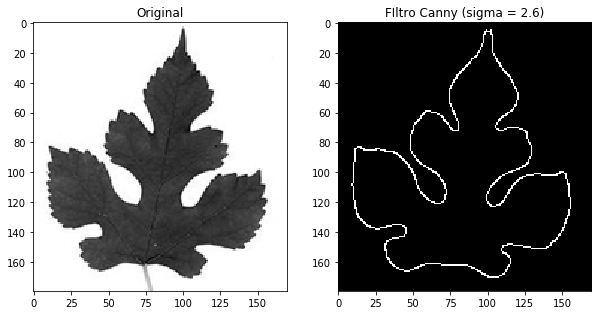

In [120]:
from skimage.filters import sobel
from skimage.color import rgb2gray
from skimage.feature import canny

image3 = rgb2gray(skio.imread('hw3_leaf_training_1.jpg'))

edges = canny(image3, sigma=2.6)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes = axes.ravel()

axes[0].imshow(image3, 'gray')
axes[0].set_title("Original")

axes[1].imshow(edges, 'gray')
axes[1].set_title("FIltro Canny (sigma = 2.6)")

plt.show()

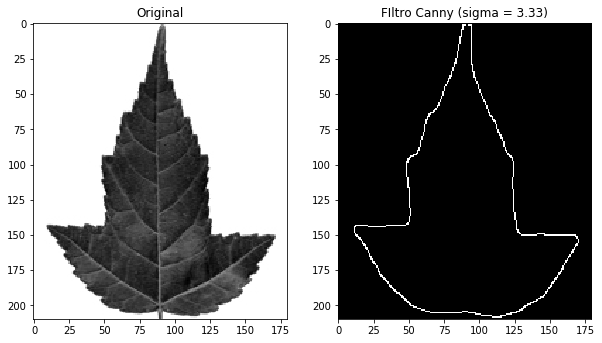

In [121]:
image4 = rgb2gray(skio.imread('hw3_leaf_training_4.jpg'))

edges = canny(image4, sigma=3.33)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes = axes.ravel()


axes[0].imshow(image4, 'gray')
axes[0].set_title("Original")

axes[1].imshow(edges, 'gray')
axes[1].set_title("FIltro Canny (sigma = 3.33)")

plt.show()

Foi necessário aumentar o sigma do kernel de Canny para que não fossem identificadas partes internas da hw3_leaf_training como borda.

## Transformada circular de Hough

6. Estude os exemplos de uso da transformada circular de Hough para detecção de círculos em imagens [10],[11]. Depois, identifique o número de moedas na imagem *Brazilian_coins* [12]. Devido à iluminação, talvez não seja possível identificar corretamente todas.


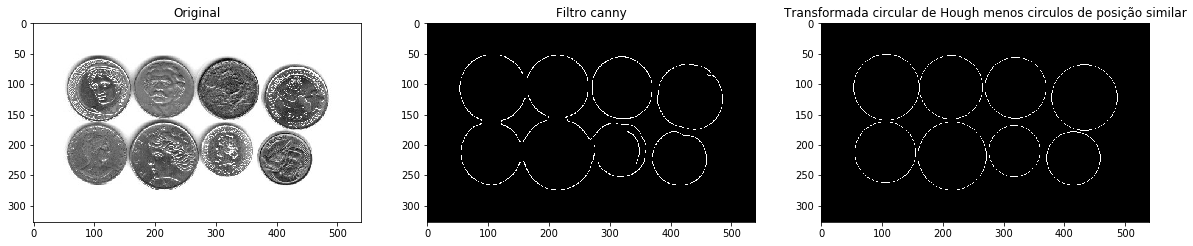

Numero de moedas : 
8


In [138]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

image = rgb2gray(skio.imread('Brazil.jpg'))
image = np.pad(image, 50, 'constant', constant_values=image[0][0])

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title("Original")

edges = canny(image, sigma=4.8)
axes[1].imshow(edges, cmap=plt.cm.gray)
axes[1].set_title("Filtro canny")


hough_radii = np.arange(40, 80, 2)
hough_res = hough_circle(edges, hough_radii)


accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=20)


# Draw them
image = np.zeros([image.shape[0],image.shape[1]],dtype=np.uint8)

circles = []
for center_y, center_x, radius in zip(cy, cx, radii):
    
    if all((center_x - xc) ** 2 + (center_y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
        #print(center_x, center_y, r)
        circles.append((center_x, center_y, radius))
        circy, circx = circle_perimeter(center_y, center_x, radius)
        image[circy, circx] = 255


    
axes[2].imshow(image, cmap=plt.cm.gray)
axes[2].set_title("Transformada circular de Hough menos circulos de posição similar")
plt.show()
num = len(circles)


print("Numero de moedas : ")
print(num)

## Referências

[1] hw3_train.jpg de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip

[2] https://www.codingame.com/playgrounds/2524/basic-image-manipulation/filtering

[3] https://scikit-image.org/docs/dev/api/skimage.morphology.html

[4] https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#image-smoothing

[5] https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#noise-removal

[6] hw3_road_sign_school_blurry.jpg de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip

[7] https://scikit-image.org/docs/dev/auto_examples/filters/plot_unsharp_mask.html

[8] hw3_leaf_training_1.jpg de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip

[9] hw3_leaf_training_4.jpg de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip

[10] https://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html

[11] https://www.codingame.com/playgrounds/38470/how-to-detect-circles-in-images

[12] http://worldcoingallery.com/countries/bg/Brazil.jpg


## Bibliografia

https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#image-smoothing


https://www.mathworks.com/help/images/what-is-image-filtering-in-the-spatial-domain.html

https://www.mathworks.com/examples/image/mw/images-ex48835658-detect-edges-in-images

https://www.mathworks.com/examples/image/mw/images-ex80028725-trace-boundaries-of-objects-in-images

https://www.mathworks.com/help/images/ref/imfindcircles.html#examples

https://www.mathworks.com/examples/image/community/18507-missing-planes